In [1]:
import matplotlib.pyplot as plt
import illustris_python as il
import numpy as np
import sys
import pandas as pd
import h5py
import ast
import matplotlib.image as mpim
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns
import glob
import re
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import optimize as opt

In [2]:


# Path to the directory containing the CSV files
directory = '/home/draco/padua/computational astro/'

# Pattern for matching the CSV files
file_pattern = 'smbh_snap_results*.csv'

# Gets a list of file paths that match the pattern
file_paths = glob.glob(directory + file_pattern)

# Dictionary to store the DataFrames
df= {}
snap_id =[]
# Iterating over the file paths to extract the ID from the file name
for file_path in file_paths:
        
    file_name = file_path.split('/')[-1]  # Extracting the file name from the path
#     print(file_name)
    snapid = re.findall(r'\d+', file_name.split('_')[2])[0]  # Extracting the ID from the file name
    snap_id.append(snapid)
   
    ############ Reads the CSV file and store it as a DataFrame #################
    
    df[snapid] = pd.read_csv(file_path)

######### examplpe to call snap 17 df['17'] ################

########### Removing unwanted columns #############
for id in snap_id:
    
    df[id] = df[id].drop(['snap','Unnamed: 0','id',],axis = 1)



In [3]:
#####################  Defining Constants ###############
h = 0.6774
to_M_solar = h*1e10  ###### for converting to solar masses 
    


In [342]:
# M_bhs = {}
# Massinrad_stars = {}
# Veldisp = {}
# Bhmdot = {}
# for id in snap_id:
#     M_bhs[id] = df[id]['mass_bhs']* to_M_solar
#     Massinrad_stars[id] = df[id]['massinrad_stars']*to_M_solar
#     Veldisp[id] = df[id]['veldisp']
#     Bhmdot[id] = df[id]['bhmdot']

In [5]:
df_n = pd.DataFrame()

for id in snap_id:
    df_n[f'M_bhs_{id}'] = df[id]['mass_bhs'] * to_M_solar
    df_n[f'Massinrad_stars_{id}'] = df[id]['massinrad_stars'] * to_M_solar
    df_n[f'Veldisp_{id}'] = df[id]['veldisp']
    df_n[f'Bhmdot_{id}'] = df[id]['bhmdot']
df_n  

,M_bhs_67,Massinrad_stars_67,Veldisp_67,Bhmdot_67,M_bhs_25,Massinrad_stars_25,Veldisp_25,Bhmdot_25,M_bhs_33,Massinrad_stars_33,...,Veldisp_50,Bhmdot_50,M_bhs_4,Massinrad_stars_4,Veldisp_4,Bhmdot_4,M_bhs_17,Massinrad_stars_17,Veldisp_17,Bhmdot_17
0,2.681081e+09,7.518666e+11,582.5270,9.158250e-04,182505108.0,4.776259e+10,363.386,0.004450,1.754791e+09,2.763054e+11,...,566.656,0.000829,562242.0,132722982.0,109.0000,0.000174,83421810.0,5.924418e+10,320.3990,0.020768
1,3.972951e+08,1.046617e+11,300.2400,3.946560e-04,49131822.0,2.612529e+10,345.422,0.043641,1.304808e+08,2.028054e+10,...,293.763,0.000255,934812.0,38469546.0,72.7139,0.000000,589338.0,4.588030e+07,50.9085,0.000034
2,2.861134e+08,6.222163e+10,177.4870,2.206160e-04,170413518.0,2.071516e+10,180.505,0.029779,2.252152e+08,2.166793e+10,...,180.177,0.000295,799332.0,128130210.0,121.0200,0.000303,609660.0,8.565723e+07,58.2162,0.000011
3,4.115882e+08,8.412766e+10,221.9640,2.416140e-05,8562336.0,1.062170e+10,142.471,0.001636,7.020574e+07,1.160833e+10,...,232.974,0.000451,860298.0,128915994.0,126.8310,0.000144,28843692.0,3.574443e+10,258.1310,0.003534
4,2.548582e+08,3.022281e+10,160.9330,1.135310e-04,35407698.0,2.854130e+10,234.500,0.074457,9.171996e+07,1.299578e+10,...,187.832,0.000031,575790.0,179145204.0,109.1450,0.000130,1165128.0,1.556360e+09,122.0680,0.001596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36953,1.165128e+06,0.000000e+00,14.2476,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36954,1.063518e+06,0.000000e+00,15.9759,2.000000e-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36955,5.961120e+05,0.000000e+00,18.2254,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36956,1.043196e+06,2.878950e+06,20.8872,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
id = 99
df1 = df_n[( df_n[f'M_bhs_{id}'] != 0) & (df_n[f'Massinrad_stars_{id}'] != 0)&(df_n[f'Massinrad_stars_{id}'] > 10e8)].dropna(subset=[f'M_bhs_{id}', f'Massinrad_stars_{id}'])
len(df1)

12125

Text(0, 0.5, 'Mass Black Holes $M_{\\odot}$')

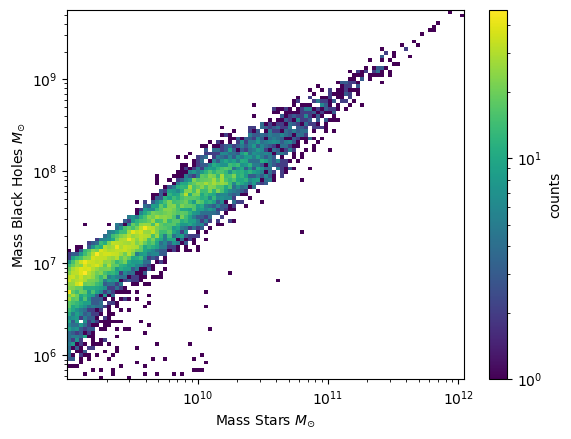

In [7]:
# df1 = df_n[( df_n[f'M_bhs_{id}'] != 0) & (df_n[f'Massinrad_stars_{id}'] != 0)]
bin1=np.logspace(np.log10(min(df1[f'M_bhs_{id}'])),np.log10(max(df1[f'M_bhs_{id}'])),num = 100)
bin2=np.logspace(np.log10(min( df1[f'Massinrad_stars_{id}'])),np.log10(max( df1[f'Massinrad_stars_{id}'])),num = 100)
plt.hist2d(df1[f'Massinrad_stars_{id}'],df1[f'M_bhs_{id}'],bins=(bin2,bin1),norm=colors.LogNorm())#,density= True)
plt.yscale('log')
plt.xscale('log')
# plt.xlim(10e8)
plt.colorbar(label="counts")
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')


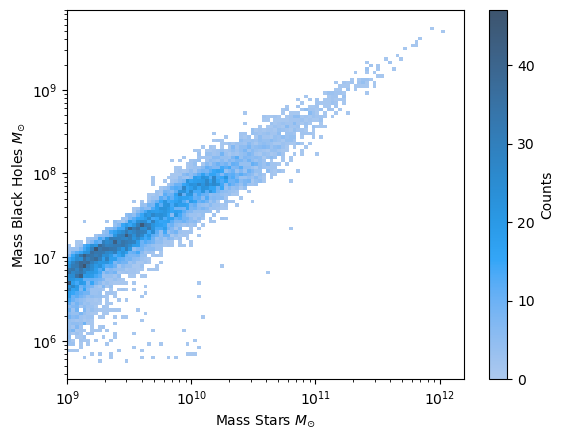

In [346]:
from sklearn.linear_model import LinearRegression

# Prepare the data


sns.histplot(x = (df1[f'Massinrad_stars_{id}']),y =(df1[f'M_bhs_{id}']) ,data =df1,bins = (bin2,bin1) ,cbar = True, cbar_kws={'label': 'Counts'})

# sns.scatterplot(x=x, y=y, hue=counts, cbar_kws={'label': 'Counts'})
plt.yscale('log')
plt.xscale('log')
plt.xlim(10e8)
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
plt.show()# print(x) 
# # Create an instance of the linear regression model
# model = LinearRegression()

# # Fit the model to the data
# model.fit(x, y)

# # Get the predicted values
# y_pred = model.predict(x)

# # Plot the data points and the best-fit line
# plt.scatter(x, y, alpha=0.1, color='grey')
# plt.plot(x, y_pred, color='red', label='Best-fit line')

# # Customize the plot
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(10e8)
# plt.colorbar(label="counts")
# plt.xlabel('Mass Stars $M_{\odot}$')
# plt.ylabel('Mass Black Holes $M_{\odot}$')
# plt.legend()

# # Show the plot
# plt.show()


<AxesSubplot:>

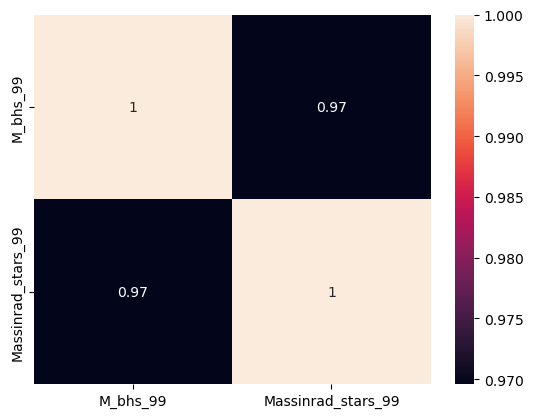

In [8]:
 sns.heatmap(df1[[f'M_bhs_{id}', f'Massinrad_stars_{id}']].corr(),annot=True)

In [348]:
# X = (df1[f'Massinrad_stars_{id}']).values
# Y = (df1[f'M_bhs_{id}']).values
X = np.log10(df1[f'Massinrad_stars_{id}']).values
Y = np.log10(df1[f'M_bhs_{id}']).values
permutation = np.random.permutation(len(df1))     # random permutation
X = X[permutation]
Y = Y[permutation]
m_training = int(len(df1)*0.80)
# m_test is the number of samples in the test set (total-training)
m_test = int(len(df1)-(len(df1)*0.80))


# X_training = instances for training set
X_training = X[:int(len(df1)*0.80)] 
# Y_training = labels for the training set
Y_training = Y[:int(len(df1)*0.80)]
# print (Y_training)
# X_test = instances for test set
X_test = X[int(len(df1)*0.80):] 
# Y_test = labels for the test set
Y_test = Y[int(len(df1)*0.80):] 
X_training = X_training.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# np.log10(df1[f'Massinrad_stars_{id}']).values

Coefficients: 
 [1.01853027]
Intercept: 
 -2.4721215101092078
Mean squared error: 0.04
Coefficient of determination: 0.86


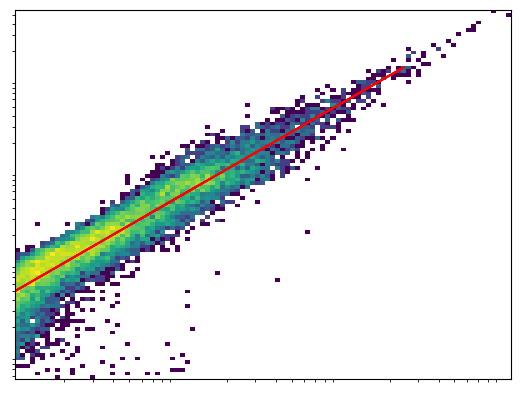

In [349]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_training, Y_training)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)
# The coefficients which is the slope
print("Coefficients: \n", regr.coef_)
# The intercept
print ("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

# Plot outputs

plt.plot(10**(X_test), 10**(Y_pred), color="red")#, linewidth=3)
plt.hist2d(df1[f'Massinrad_stars_{id}'],df1[f'M_bhs_{id}'],bins=(bin2,bin1),norm=colors.LogNorm())
# # plt.scatter(X_test, Y_test, color="red",alpha = 0.01)
plt.yscale('log')
plt.xscale('log')
plt.xticks(())
plt.yticks(())

plt.show()

In [350]:
# plt.scatter(X_test, Y_test, marker="+", label="Actual values",alpha =0.4)
# plt.plot(X_test, Y_pred, color = "red", label="Predicted values")
# plt.title("Chelsea is the best")
# plt.xlabel("Galaxy mass")
# plt.ylabel("Black hole mass")
# plt.legend()
# plt.show()

In [351]:
#make a giant loop to check how different the intercept and gradient are
intercepts = []
gradients = []
errors = []

for x in range(100):
    
    permutation = np.random.permutation(len(df1))     # random permutation
    X = X[permutation]
    Y = Y[permutation]
    m_training = int(len(df1)*0.80)
    # m_test is the number of samples in the test set (total-training)
    m_test = int(len(df1)-(len(df1)*0.80))

    # X_training = instances for training set
    X_training = X[:m_training] 
    # Y_training = labels for the training set
    Y_training = Y[:m_training]
    # print (Y_training)
    # X_test = instances for test set
    X_test = X[m_training:] 
    # Y_test = labels for the test set
    Y_test = Y[m_training:] 
    X_training = X_training.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_training, Y_training)
    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)
    # The coefficients which is the slope
    print("Coefficients: \n", regr.coef_)
    gradients.append(regr.coef_)
    # The intercept
    print ("Intercept: \n", regr.intercept_)
    intercepts.append(regr.intercept_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    errors.append(mean_squared_error(Y_test, Y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


Coefficients: 
 [1.01424895]
Intercept: 
 -2.4319160799676354
Mean squared error: 0.04
Coefficient of determination: 0.87
Coefficients: 
 [1.01952877]
Intercept: 
 -2.48243880343194
Mean squared error: 0.04
Coefficient of determination: 0.85
Coefficients: 
 [1.01902887]
Intercept: 
 -2.4771475455245646
Mean squared error: 0.04
Coefficient of determination: 0.86
Coefficients: 
 [1.01539659]
Intercept: 
 -2.4416764955205004
Mean squared error: 0.04
Coefficient of determination: 0.87
Coefficients: 
 [1.02212705]
Intercept: 
 -2.508891026349769
Mean squared error: 0.03
Coefficient of determination: 0.88
Coefficients: 
 [1.01554291]
Intercept: 
 -2.4437450813219845
Mean squared error: 0.04
Coefficient of determination: 0.85
Coefficients: 
 [1.01537031]
Intercept: 
 -2.4422841585197483
Mean squared error: 0.04
Coefficient of determination: 0.87
Coefficients: 
 [1.01894605]
Intercept: 
 -2.4774842261423284
Mean squared error: 0.04
Coefficient of determination: 0.87
Coefficients: 
 [1.01779656

In [352]:
# Plot outputs

#     plt.scatter(X_test, Y_test, marker="+", label="Actual values")
#     plt.plot(X_test, Y_pred, color = "red", label="Predicted values")
    
#     plt.xlabel("Galaxy mass")
#     plt.ylabel("Black hole mass")
#     plt.legend()
#     plt.show()

In [353]:
m = np.mean(gradients)
c = np.mean(intercepts)
print ("Intercept: \n",c)
print("Slope: \n",m)
print("MSE: \n",mean_squared_error(Y_test, Y_pred))
#best line of best fit parameters:

Intercept: 
 -2.4599630159500787
Slope: 
 1.0172213150248972
MSE: 
 0.03710565732717907


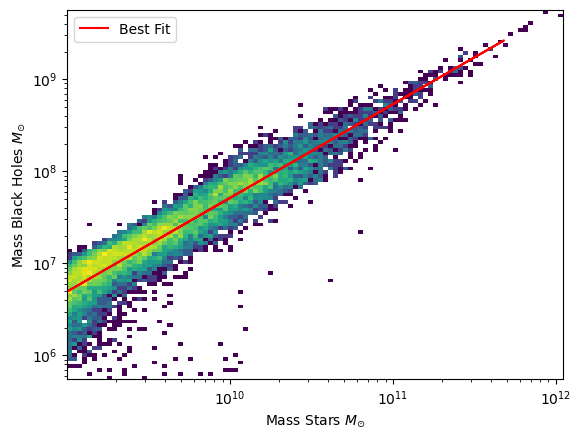

In [354]:
plt.hist2d(df1[f'Massinrad_stars_{id}'],df1[f'M_bhs_{id}'],bins=(bin2,bin1),norm=colors.LogNorm())
Y_pred = m*X_test+c
plt.plot(10**(X_test), 10**(Y_pred), color = "red", label="Best Fit")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
plt.legend()
plt.show()

I tried using Linear regression in Scikit learn to find the best fit line. I split the data into trainig and test set and also permuted the data to avoid overfitting. By using the lineat regression I am trying to obtain the coefficient which is the slope of the linear fit and the intercept. Taking the Xtest values and using the value for the coefficient and the intercept im predicting Y. 

### Using Scipy

In [366]:
X = np.log10(df1[f'Massinrad_stars_{id}']).values
Y = np.log10(df1[f'M_bhs_{id}']).values

def func(x, params):
    a, b = params
    y = a * x + b
    return y

def residual(params, x, y):
    res = func(x, params) - y
    return res

In [392]:
params_guess = [1, -2]
lsq = opt.least_squares(residual, params_guess, args=(X, Y))
a_fit, b_fit = lsq.x
print(a_fit, b_fit)


1.0171792732445273 -2.459519572403977


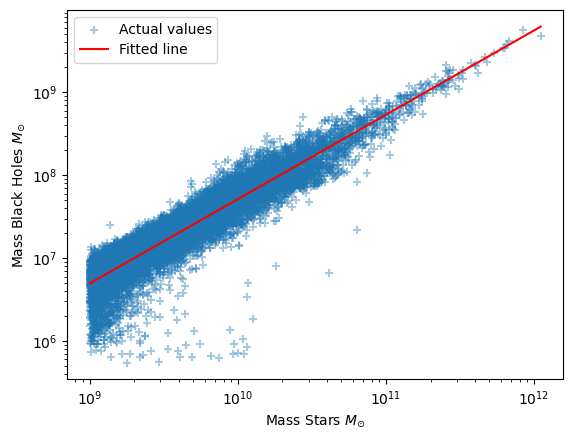

In [394]:
plt.scatter(10**X, 10**Y, marker="+", label="Actual values",alpha =0.4)
plt.plot(10**X, 10**func(X, params = (a_fit, b_fit) ), color='red', label='Fitted line')
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Let us try to plot the data given in url = {https://doi.org/10.1088%2F0004-637x%2F813%2F2%2F82}, Reines et al 15


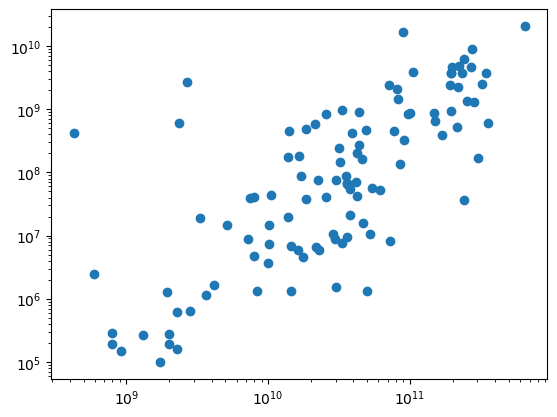

In [463]:

data = np.genfromtxt('Reines.dat', usecols=(2, 3))
#identifying the NaN values since due to presence of a string there is some issue
nan_mask = np.isnan(data)
# Assign the values to the NaN values 
data[nan_mask] = [9.43, 8.63]

Mstars_r = 10**data[:,0]
Mbhs_r = 10**data[:,1]
plt.scatter(Mstars_r,Mbhs_r)
plt.xscale("log")
plt.yscale("log")




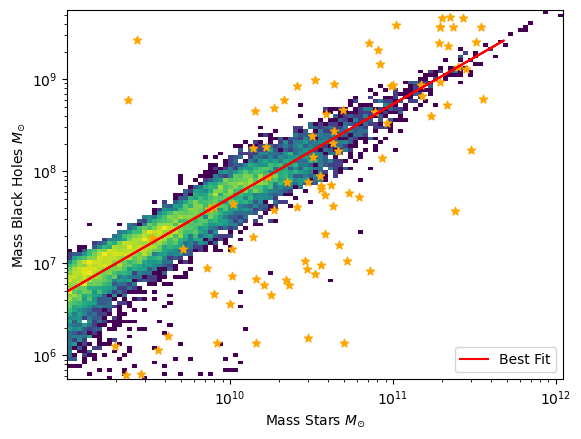

In [464]:
plt.hist2d(df1[f'Massinrad_stars_{id}'],df1[f'M_bhs_{id}'],bins=(bin2,bin1),norm=colors.LogNorm())
Y_pred = m*X_test+c
plt.plot(10**(X_test), 10**(Y_pred), color = "red", label="Best Fit")
plt.scatter(Mstars_r,Mbhs_r,color ='orange',marker='*')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
plt.legend()
plt.show()

using scikit linear regression 

In [474]:
Mbhs_r_test = Mbhs_r.reshape(-1,1)
Mstars_r_pred = regr.predict(Mbhs_r_test) 
     # The mean squared error

print("Mean squared error: %.2f" % mean_squared_error(Mstars_r, Mstars_r_pred))

    # The coefficient of determination: 1 is perfect prediction

print("Coefficient of determination: %.2f" % r2_score(Mstars_r, Mstars_r_pred))

Mean squared error: 16999304214914699100160.00
Coefficient of determination: -0.49


Using lsq fit

In [489]:
params_guess = [0,0]
lsq = opt.least_squares(residual, params_guess, args=(Mstars_r, Mbhs_r))
ar_fit, br_fit = lsq.x
print(ar_fit, br_fit)


0.016417638720368957 -3.4998652214870085


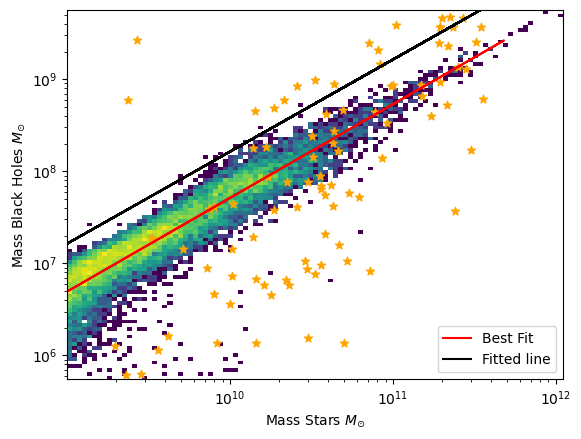

In [490]:
plt.hist2d(df1[f'Massinrad_stars_{id}'],df1[f'M_bhs_{id}'],bins=(bin2,bin1),norm=colors.LogNorm())
Y_pred = m*X_test+c
plt.plot(10**(X_test), 10**(Y_pred), color = "red", label="Best Fit")
plt.scatter(Mstars_r,Mbhs_r,color ='orange',marker='*')
plt.plot(Mstars_r, func(Mstars_r, params = (ar_fit, br_fit) ), color='black', label='Fitted line')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
plt.legend()
plt.show()

How can i implement chi-square or any other way to find the best values of m and c in case of least square fit?
